In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import scipy.io
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

In [2]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=True)

font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 11}

mpl.rc('font', **font)

jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=1.5)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

In [3]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [4]:
range_short = [400, 450, 500, 550, 600, 650, 700]
range_long = [700, 750, 800, 850, 900, 950, 1000]

# Network

$$ \tau\frac{du}{dt} = -u + \theta(W_{uI}I - W_{uv}v + \eta_u) $$
$$ \tau\frac{dv}{dt} = -v + \theta(W_{vI}I - W_{vu}v + \eta_v) $$
$$ \tau\frac{dy}{dt} = -y + W_{yu}u - W_{yv}v + \eta_y $$

In [32]:
params = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 1,
              'tau': 100,
              'th': 0.7,
              'sigma': 0.01,}

In [6]:
def sigmoid(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

In [7]:
def network(state_init, t, I, params):
    # Unpack parameters of the simulation
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    th = params['th'] #The target (threshold) value of y
    sigma = params['sigma']

    u, v, y = state_init

    dudt = (-u + sigmoid(Wut * I - Wuv * v )) / tau *dt
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u )) / tau *dt
    dydt = (-y + u - v) / tau * dt

    return [dudt, dvdt, dydt]

In [8]:
def nullclines(I, u, v):
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    U = sigmoid(Wut * I - Wuv * v)
    V = sigmoid(Wvt * I - Wvu * u )
    y =  U - V
    return U,V, y

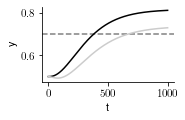

In [36]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,1, figsize=(2.7,1.8))
ax.axhline(0.7, linestyle='--', color='gray')

I1=0.65
I2= 0.75

s1 = odeint(network, state_init, t, args=(I1, PARAMS_DICT))
s2 = odeint(network, state_init, t, args=(I2, PARAMS_DICT))

ax.plot(t, s1[:,2],  color='k', label = str(I1))
ax.plot(t, s2[:,2],  color='#cccccc', label = str(I2))
#ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('t', fontdict=font)
ax.set_ylabel('y', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsexp.svg', dpi=500, bbox_inches='tight')

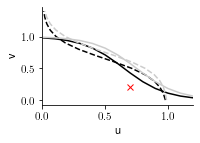

In [46]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(2.7,1.8))

I1=0.65
U,V,Y = nullclines(I1, u, v)

ax.plot(u, U,  color='k', label = str(I1))
ax.plot(V, v,   '--', color='k')

I2= 0.75
U,V,Y = nullclines(I2, u, v)

ax.plot(u, U,  color='#cccccc', label = str(I2))
ax.plot(V, v,  '--', color='#cccccc')
ax.plot(state_init[0], state_init[1], 'x', color='r')


plt.xlabel('u')
plt.ylabel('v')
plt.xlim(0,1.2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('../report/figures/nullclines.png', dpi=500, bbox_inches='tight')

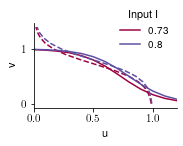

In [113]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(2.8,2.3))

I1=0.73
U,V,Y = nullclines(I1, u, v)

ax.plot(u, U,  color=colors_short[0], label = str(I1))
ax.plot(V, v,   '--', color=colors_short[0])

I2= 0.8
U,V,Y = nullclines(I2, u, v)

ax.plot(u, U,  color=colors_long[-1], label = str(I2))
ax.plot(V, v,  '--', color=colors_long[-1])

plt.xlim(0,1.2)

plt.xlabel('u')
plt.ylabel('v')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 10})

plt.tight_layout()

plt.savefig('../report/figures/nullclines_range.png', dpi=500, bbox_inches='tight')

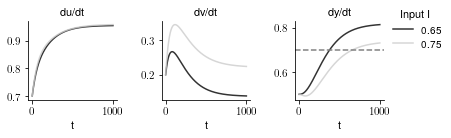

In [25]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

I1=0.65
I2= 0.75

s1 = odeint(network, state_init, t, args=(I1, PARAMS_DICT))
s2 = odeint(network, state_init, t, args=(I2, PARAMS_DICT))

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')


ax[0].plot(t, s1[:,0], color='k', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='k', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='k', alpha=0.8, label = '0.65')
ax[0].plot(t, s2[:,0], color='#cccccc', alpha=0.8)
ax[1].plot(t, s2[:,1],  color='#cccccc', alpha=0.8)
ax[2].plot(t, s2[:,2],  color='#cccccc', alpha=0.8, label = '0.75')
ax[2].axhline(0.7, linestyle='--', color='gray')
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 10})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamics_uvy.svg', dpi=500, bbox_inches='tight')

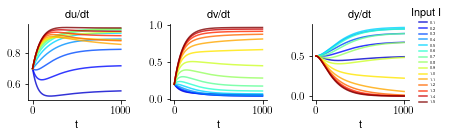

In [15]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.1,1.6,0.1):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsI.svg', dpi=500, bbox_inches='tight')

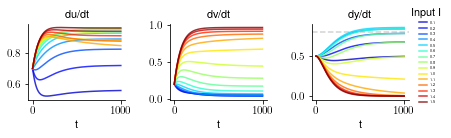

In [25]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
params['tau'] = 80
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.8, linestyle='--', color='lightgray')

for i in np.arange(0.1,1.6,0.1):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

plt.tight_layout()

# low, intermediate and high regimes of I

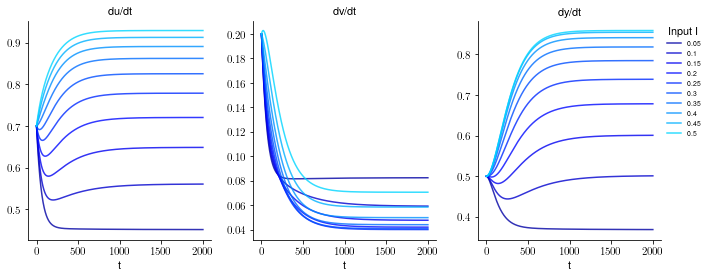

In [16]:
#low regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.05,0.55,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)
    
'''s1 = odeint(network, state_init, t, args=(0.55, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(0.55))'''

ax[2].legend(bbox_to_anchor=(1, 1.), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
plt.savefig('../report/figures/lowI.png', dpi=500, bbox_inches='tight')

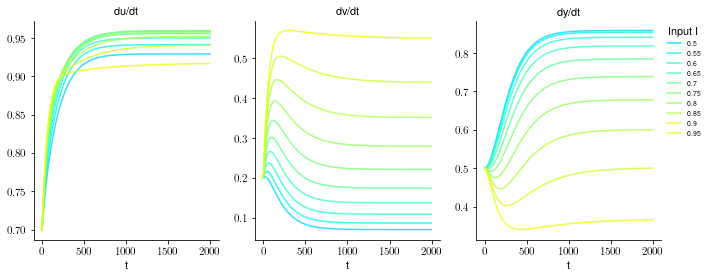

In [13]:
#imtermediate regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.5,1.0,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)
'''    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))'''

ax[2].legend(bbox_to_anchor=(1, 1.), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
plt.savefig('../report/figures/intermediateI.png', dpi=500, bbox_inches='tight')

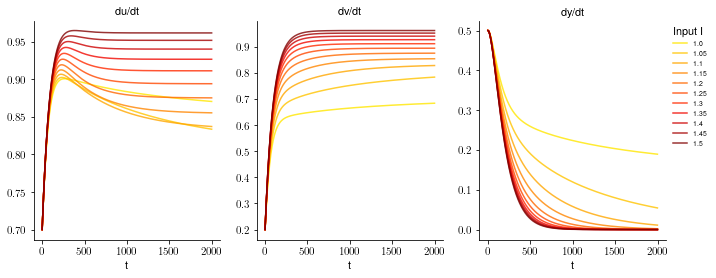

In [12]:
#high regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = params['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(1.0,1.55,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1.25, 1.), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
plt.savefig('../report/figures/highI.png', dpi=500, bbox_inches='tight')

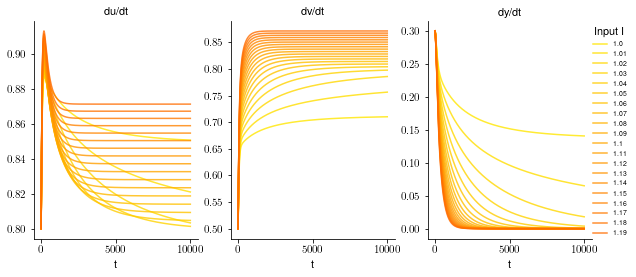

In [15]:
#high regime

state_init = [0.8, 0.5, 0.3] #u, v, y
dt = params['dt']
T = 10000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(1.0,1.2,0.01):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, params))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1.25, 1.), title='Input I', frameon=False,  prop={'size': 7}) #4
    
#plt.tight_layout()
#plt.savefig('../report/figures/highI.png', dpi=500, bbox_inches='tight')

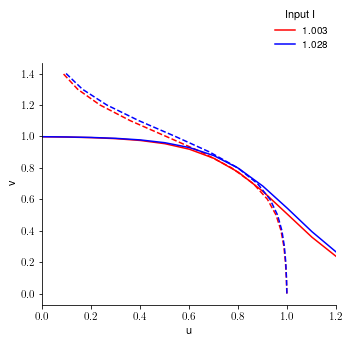

In [36]:
state_init = [0.8, 0.5, 0.3] #u, v, y
dt = params['dt']
u = np.arange(0,1.5,0.1)
v = np.arange(0,1.5,0.1)

fig, ax = plt. subplots(1,1, figsize=(5,5)) #2.8,2.3

I1=1.003

U,V,Y = nullclines(I1, u, v)

ax.plot(u, U,  color='r', label = str(I1))
ax.plot(V, v,   '--', color='r')

I2= 1.028
U,V,Y = nullclines(I2, u, v)

ax.plot(u, U,  color='b', label = str(I2))
ax.plot(V, v,  '--', color='b')

plt.xlim(0,1.2)

plt.xlabel('u')
plt.ylabel('v')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 10})

plt.tight_layout()

## changing parameter

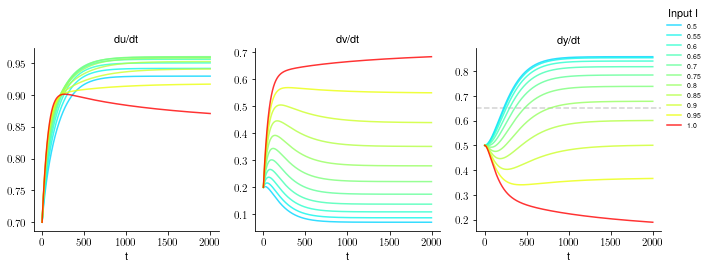

In [65]:
#imtermediate regime

state_init = [0.7, 0.2, 0.5] #u, v, y
PARAMS_DICT['tau'] = 100
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.65, linestyle='--', color='lightgray')

for i in np.arange(0.5,1.0,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)
    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

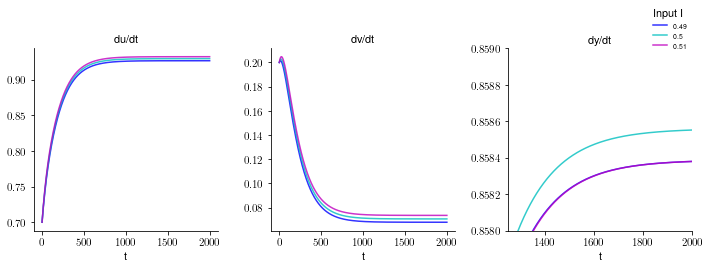

In [79]:
#imtermediate regime

state_init = [0.7, 0.2, 0.8] #u, v, y
PARAMS_DICT['tau'] = 100
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.65, linestyle='--', color='lightgray')

for j,i in enumerate([0.49,0.5,0.51]):
    c = ['b','c','m'][j]
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
ax[2].set_ylim(0.858,0.859)
ax[2].set_xlim(1250,2000)

plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

# Mean Dynamics

### Intermediate I

In [5]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot
from onetwogo.plot import SortedPlot

In [6]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

In [119]:
params = Params(ntrials=500, delay=700, tau=80, th=0.8)
expsim = ExperimentSimulation(params)

stimulus_range1 = [400,500,600,700,800]
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]
stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
alpha=1
exp_result1 = expsim.simulate(stimulus_lst1, K)
exp_result2 = expsim.simulate(stimulus_lst2, K)

In [14]:
print(exp_result1.simulation[:,3].mean())
print(exp_result1.simulation[:,3].std())

0.7633675980482697
0.00840173363732779


In [15]:
print(exp_result2.simulation[:,3].mean())
print(exp_result2.simulation[:,3].std())

0.7776513867455205
0.0024755421951272736


In [7]:
params = Params(delay=700, tau=100, th=0.7)
expsimS = ExperimentSimulation(params)

K = 8.5  # 14
exp_resultS = expsimS.simulate(stimulus_short, K)

In [8]:
min(exp_resultS.simulation[:,3])

array([0.73598577])

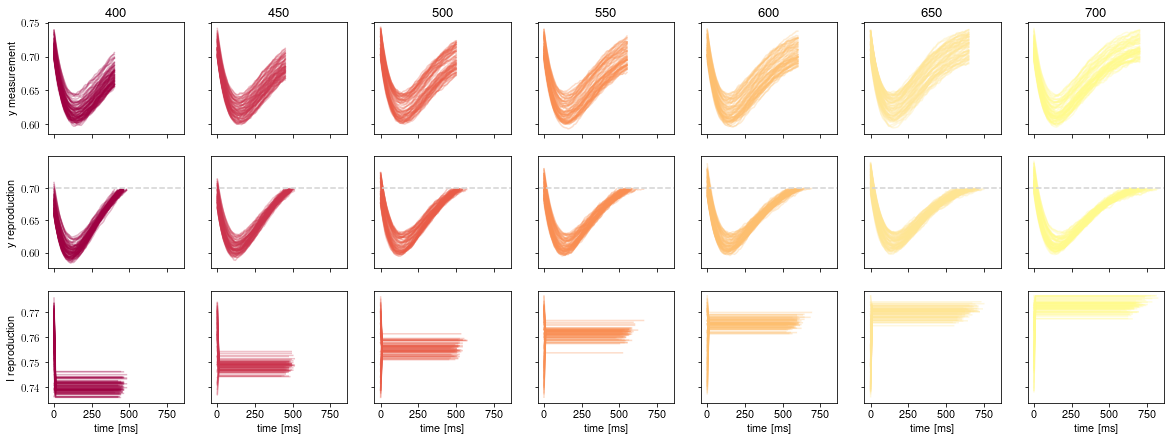

In [9]:
plot = SortedPlot(exp_resultS.create_sorted_data(2))
plot.plot_sorted()

In [10]:
params = Params(delay=700, tau=100, th=0.7)
expsimL = ExperimentSimulation(params)

K = 6  # 8
exp_resultL = expsimL.simulate(stimulus_long, K)

In [11]:
max(exp_resultL.simulation[:,3])

array([0.8])

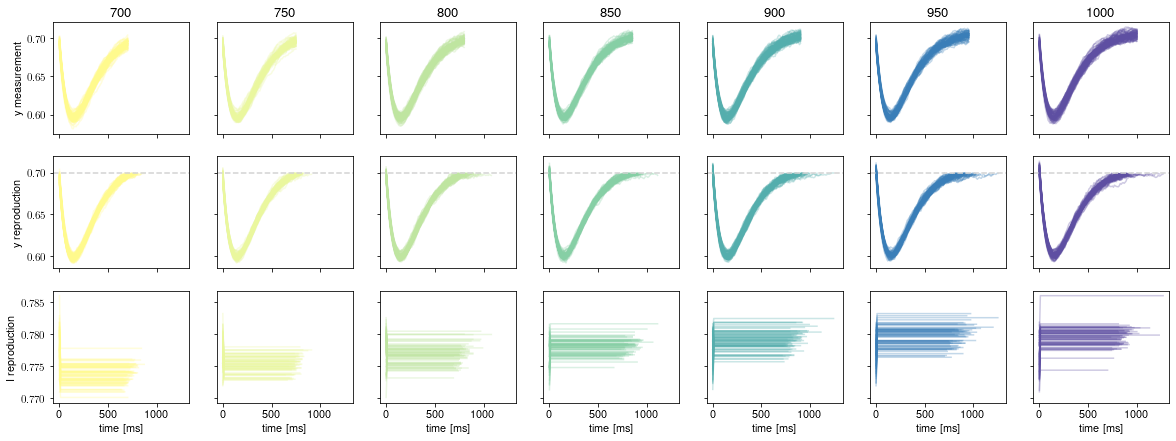

In [12]:
#plot = exp_result.create_sorted_plot()
plot = SortedPlot(exp_resultL.create_sorted_data(2))
plot.plot_sorted()

### High I

In [65]:
params = Params(Iinit=1.02, ntrials=500, delay=700, tau=100, th=0.1, IF=-500)
expsimS = ExperimentSimulation(params)

K = 13
exp_resultS = expsimS.simulate(stimulus_short, K)

In [66]:
print(exp_resultS.simulation[:,3].max())

1.1385802998953711


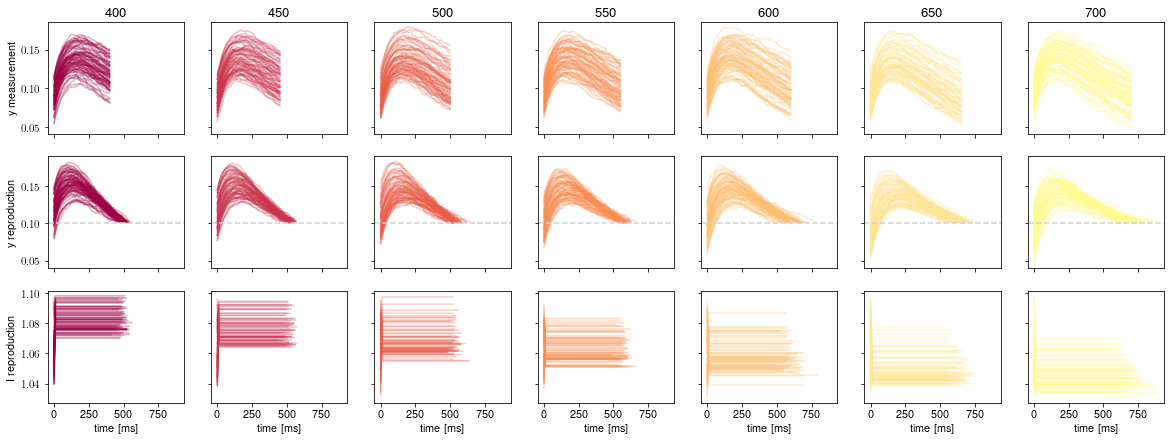

In [67]:
plot = SortedPlot(exp_resultS.create_sorted_data(2))
plot.plot_sorted()

In [72]:
params = Params(Iinit=1.02, ntrials=500, delay=700, tau=100, th=0.1, IF=-500)
expsimL = ExperimentSimulation(params)

K = 8
exp_resultL = expsimL.simulate(stimulus_long, K)

In [73]:
print(exp_resultL.simulation[:,3].min())

1.02


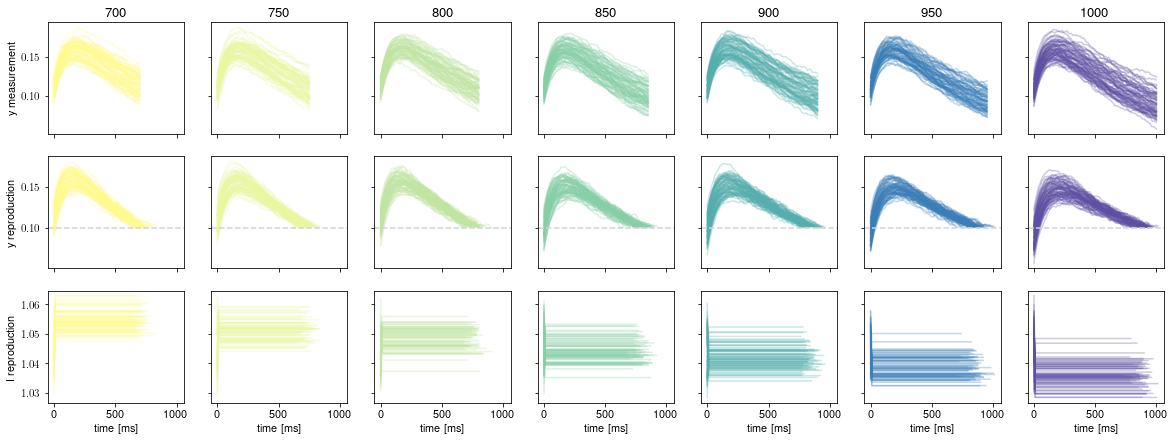

In [74]:
plot = SortedPlot(exp_resultL.create_sorted_data(2))
plot.plot_sorted()

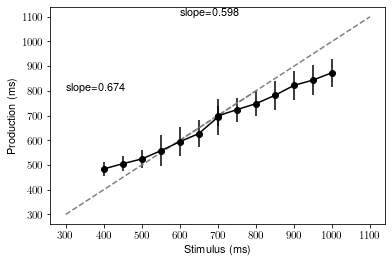

In [75]:
plot = exp_resultS.create_behavioral_plot()
plot.plot_behavior()

plot = exp_resultL.create_behavioral_plot()
plot.plot_behavior()